## Visualisation de données avec matplotlib et pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Chargez le dataset Indicator et, en vous inspirant des notebooks relatifs à la visualisation par matplotlib et pandas proposés sur l'espace de cours, produisez des cellules de code réalisant pour répondre aux instructions suivantes. 

Les graphiques devront porter un titre. Leurs axes devront être nommés et les unités précisées. Utilisez éventuellement les légendes ou les échelles de couleur si nécessaire de sorte que le graphique soit suffisant pour véhiculer une information claire.

In [3]:
df=pd.read_csv('Indicators/Indicators.csv')
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


Affichez l'histogramme des valeurs d'émission de CO2 par habitant des pays sur l'année 1976.

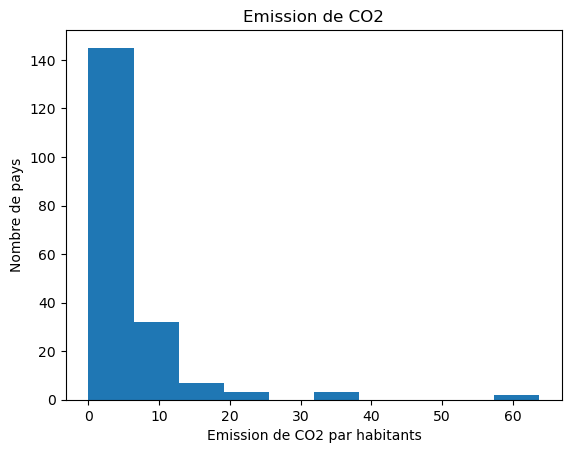

In [14]:
co2=df[(df['IndicatorName']=="CO2 emissions (metric tons per capita)") & (df['Year']==1976)]['Value']
plt.title("Emission de CO2")
plt.xlabel('Emission de CO2 par habitants')
plt.ylabel('Nombre de pays')
plt.hist(co2)
plt.show()

Utilisez un graphique en ligne pour afficher l'évolution des émission de CO2 par habitant sur l'ensemble des années disponibles pour les pays suivants : 
- Luxembourg
- Quatar
- Etats Unis d'Amérique
- Allemagne
- France
- Chine
- Inde
- Sénégal

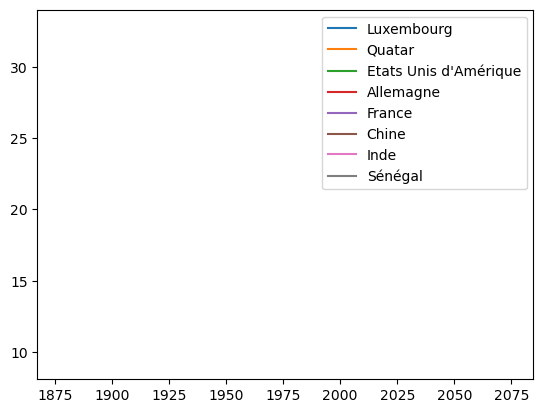

In [37]:
pays=["Luxembourg",'Quatar',"Etats Unis d'Amérique","Allemagne","France","Chine","Inde","Sénégal"]
co2Pay=df[(df['IndicatorName']=="CO2 emissions (metric tons per capita)") & (df['Year']==1976)]
for i in pays:
    data=co2Pay[co2Pay['CountryName']==i]
    plt.plot(data['Year'],data['Value'],label=i)
plt.legend(loc=1)

Utiliser un graphique en nuage de points pour afficher un graphique représentant en abscisse le PIB (GDP per capita (current US$)) et en ordonnée l'espérance de vie pour l'année 1985.

In [46]:
[i for i in df['IndicatorName'].unique() if i.find('Life')!=-1]

['Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, total (years)',
 'Lifetime risk of maternal death (%)',
 'Lifetime risk of maternal death (1 in: rate varies by country)']

In [49]:
data85=df[df['Year']==1985]
pib_85=data85.loc[data85['IndicatorName']=='GDP per capita (current US$)',['CountryName','Value']]
co2_85=data85.loc[data85['IndicatorName']=='Life expectancy at birth, total (years)',['CountryName','Value']]

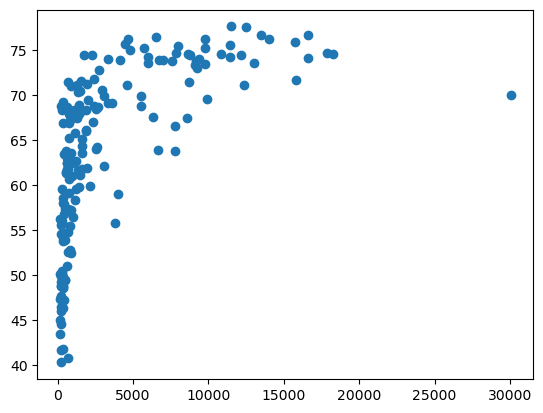

In [62]:
data=pd.merge(pib_85,co2_85,how='inner',on='CountryName')
data.columns=['CountryName','PIB','LieExprency']
plt.scatter(data['PIB'],data['LieExprency'])

Modifiez le graphique précédent de telle sorte que la surface des disques soit proportionnelle à la population du pays et que la couleur soit associée au taux d'alphabetisation (Adult literacy rate, population 15+ years, both sexes (%))

In [68]:
co2_85=data85.loc[data85['CountryName']=='CO2 emissions (metric tons per capita)',['CountryName','Value']]
pop_85=data85.loc[data85['CountryName']=='Population total',['CountryName','Value']]

Complétez le graphique en le dotant de fonctionnalités d'interaction de telle sorte qu'un clic sur un point permette l'affichage des informations suivantes relatives à l'année 1985 : 
- Nom du pays
- Valeur de l'espérance de vie
- Valeur du PIB
- Taille de la population
- Taux d'alphabétisation

In [73]:
data85[data85['IndicatorName']=='Population total']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value


Modifier le graphique en le transformant en une animation de sorte que les différentes frames permettent la visualisation des données pour les années successives.

Utilisez les fonctionnalités de la bibliothèque ipywidgets pour permettre l'affichage de l'évolution au fil des ans d'un indicateur (choisi dans une liste déroulante) pour deux pays, chacun étant choisi dans une liste déroulante.

Utilisez un widget pour sélectionner la date pour laquelle vous souhaitez visualiser le nuage de points (espérance de vie vs. PIB avec population et taux d'alphabétisation)